In [3]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import json
from collections import Counter


#CARGA DE DATOS
#Fuente: https://subscription.packtpub.com/book/application_development/9781785287466/3/ch03lvl1sec46/creating-a-pandas-dataframe-from-a-json-file
file = 'C:\\Users\\PedroW10\\Documents\\GitHub\\py-cuasqui-pupiales-pedro-javier\\Informe2b-scrapy\\scrapy_mercadol\\tmp\\productos-mercadol.json'
articulos_mercadol = pd.read_json(file)
df_3= pd.read_json(file)





![](epn1.jpg "logo epn")
                                             FACULTAD DE INGENIERÍA DE SISTEMAS
---                                        
**Materia:** Python

**Alumno:** Cuasqui Pedro

**Fecha:** 18/02/2020

**Tema:** Web scraping de la página web www.mercadolibre.com.ec 
***

### Introducción

MercadoLibre es una empresa argentina dedicada a compras, ventas y pagos por Internet. Cuenta con operaciones en cada país de origen como Bolivia, Brasil, Chile, Colombia, Costa Rica, Ecuador, Guatemala, México, Nicaragua, Panamá, Perú, Paraguay, El Salvador, República Dominicana, Uruguay, Honduras y Venezuela.

Los usuarios pueden vender y/o comprar tanto productos nuevos como usados a un precio fijo o variable también se ofrecen servicios privados. MercadoLibre también posee un servicio llamado MercadoPago, una plataforma de cobro a los compradores y pagos y abonos a los vendedores. Sus oficinas centrales se encuentran en Buenos Aires, Argentina.

### Metadatos
<table >
      <tr>
        <th>
          <h4 style="text-align: center;">Fuente de Datos: Mercado libre (Ecuador)    </h4>
        </th>
      </tr>
      <tr>
        <td style="text-align: center;">Página: <a href="www.mercadolibre.com.ec">www.mercadolibre.com.ec </a></td>
      </tr>
</table>
   <table>
      <h3>Campos usados para el análisis</h3>
      <tr>
        <th>Nombre del campo</th>
        <th>Descripción</th>
      </tr>
    <tr>
        <td>Categoría</td>
        <td>Clasificación del producto según el tipo</td>
      </tr>
      <tr>
        <td>Precio</td>
        <td>Valor establecido en la publicación del producto</td>
      </tr>
      <tr>
        <td>Provincia</td>
        <td>Ubicación geográfica del producto ofertado</td>
      </tr>
      <tr>
        <td>Título</td>
        <td>Nombre con el que se promociona el producto</td>
    </tr>
  </table>


## DESARROLLO  - WEB SCRAPING
 Para el desarrollo de web scraping se usan las librerías
+ import scrapy
+ from scrapy_mercadol.items import ProductoMercadol
+ from scrapy.loader import ItemLoader
+ from scrapy.loader.processors import TakeFirst
+ from scrapy.spiders import CrawlSpider, Rule
+ from scrapy.linkextractors import LinkExtractor

**Elementos del proyecto Scrapy usados**
```
Dominio base: listado.mercadolibre.com.ec
Lista de URLs: http://home.mercadolibre.com.ec/[NOMBRE CATEGORIA]
items.py : Crea una estructura específica para cada item
pipelines.py : Realiza el filtro de items estandarizados
settings.py : Establece el orden de ejecución de los pipelines y determina una ruta para descargar los datos
```
___
## GRÁFICAS

#### LIBRERÍAS
+ import numpy as np
+ import pandas as pd
+ import matplotlib.pyplot as plt
+ import pyreadstat


---


####  1. GRAFICO DE SECTORES: PORCENTAJE DE ARTÍCULOS POR CATEGORIA

*Se calcula el porcentaje de elementos que corresponde a cada categoría dentro de Mercado Libre*

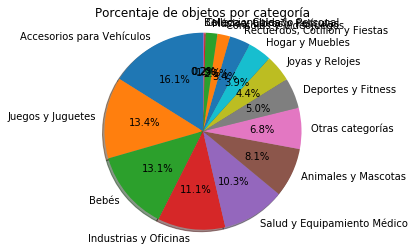

In [4]:

categorias = df_3["categoria"].value_counts()

#Obtener los nombres del indice
indice = list(categorias.index)
# Pie chart, where the slices will be ordered and plotted counter-clockwise:
labels = indice
sizes = categorias

#fig1, ax1 = plt.subplots()
plt.pie(sizes,  labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title("Porcentaje de objetos por categoría")
plt.show()


#### 2. GRAFICO DE SECTORES: PORCENTAJE DE ARTICULOS POR PROVINCIA

*El gráfico de sectores muestra el porcentaje de artículos ofertados por cada provincia, agrupados por categoría*

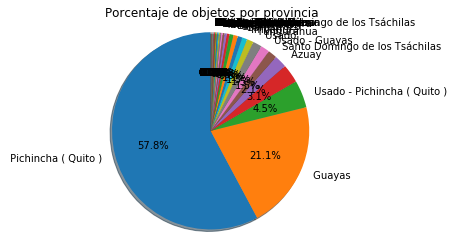

In [5]:
#2)  GRAFICO DE SECTORES: PORCENTAJE DE ARTICULOS POR PROVINCIA
provincias = df_3["provincia"].value_counts()

#Obtener los nombres del indice
indice = list(provincias.index)
# Pie chart, where the slices will be ordered and plotted counter-clockwise:
labels = indice
sizes = provincias
#fig1, ax1 = plt.subplots()
plt.pie(sizes,  labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title("Porcentaje de objetos por provincia")
plt.show()

#### 3. GRÁFICO DE BARRAS: PRODUCTO CON MAYOR PRECIO POR CADA CATEGORÍA
*El gráfico de barras muestra los productos con mayor precio agrupados por cada categoría*

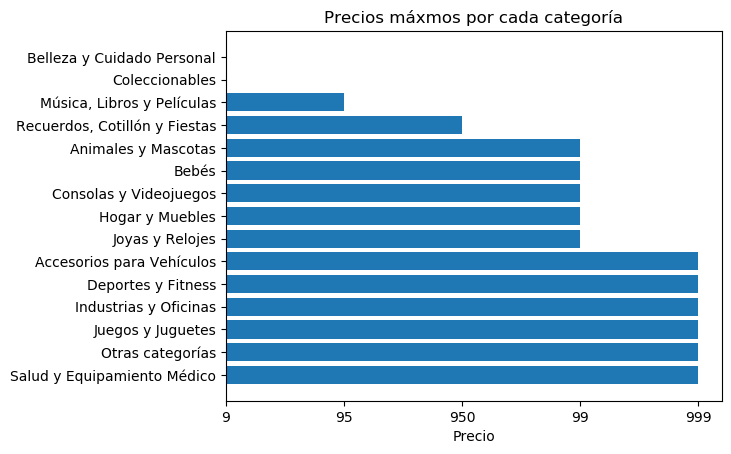

In [6]:

maximos = df_3.groupby('categoria')["precio_fraccion"].max()

plt.rcdefaults()
fig, ax = plt.subplots()

# Example data
people = list(maximos.sort_values(ascending=True).index)
y_pos = np.arange(len(people))
performance = maximos.sort_values(ascending=True)
#error = np.random.rand(len(people))

ax.barh(y_pos, performance)
ax.set_yticks(y_pos)
ax.set_yticklabels(people)
ax.invert_yaxis()  # labels read top-to-bottom
ax.set_xlabel('Precio')
ax.set_title('Precios máxmos por cada categoría')

plt.show()

#### 4. GRAFICO DE BARRAS HORIZONTALES: PALABRAS MAS FRECUENTES EN LOS TITULOS
*El gráfico de barras horizontales muestra las 50 palabras más frecuentes en los títulos*

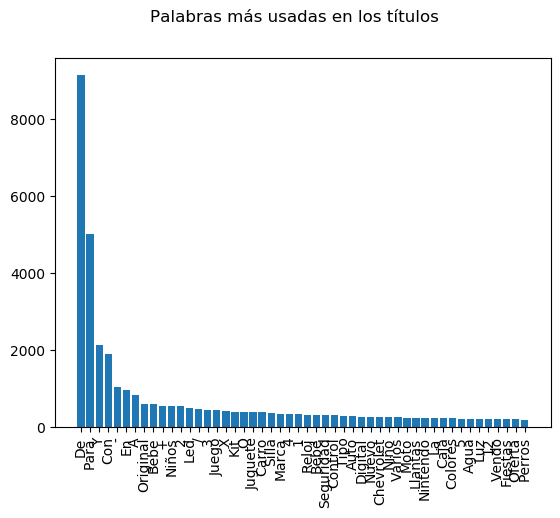

In [7]:
fp = Counter(" ".join(df_3["titulo"]).split()).most_common(50)
frec_pal_1= pd.DataFrame(fp)
frec_pal_1[0]



names = list(frec_pal_1[0])
values = list(frec_pal_1[1])
fig, axs = plt.subplots()
axs.bar(names, values)
fig.suptitle('Palabras más usadas en los títulos')
plt.xticks(rotation=90)
plt.show()

#### 5. GRÁFICO DE LINEAS: NUMERO DE PRODUCTOS POR CATEGORÍA EN PICHINCHA VS GUAYAS

*Gráfico de líneas del numero de productos agrupados en categorías y comparados por provincia (Pichincha y Guayas)*

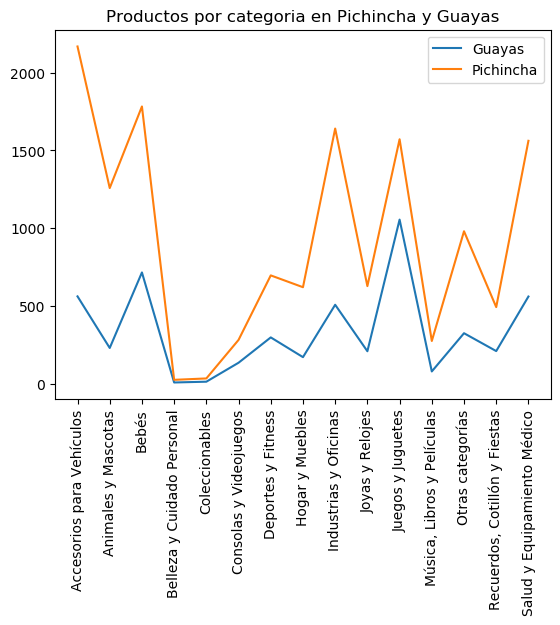

In [8]:

pichincha_completo= df_3[df_3["provincia"].str.contains("Pichincha")]
pichincha_categoria=pichincha_completo["categoria"].value_counts()
pichincha_categoria.sort_index(ascending=True)
guayas_completo= df_3[df_3["provincia"].str.contains("Guayas")]
guayas_categoria=guayas_completo["categoria"].value_counts()
guayas_categoria.sort_index(ascending=True)
categorias_provincias = list(guayas_categoria.sort_index(ascending=True).index) 


Pich = list(pichincha_categoria.sort_index(ascending=True))
Guay = list(guayas_categoria.sort_index(ascending=True))
activity = categorias_provincias

fig, ax = plt.subplots()
ax.plot(activity, Guay, label="Guayas")
ax.plot(activity,Pich, label="Pichincha")
ax.legend()
plt.xticks(rotation=90)
plt.title("Productos por categoria en Pichincha y Guayas")
plt.show()

#### 6. GRAFICO DE PUNTOS: NOMBRE DE PRODUCTOS REPETIDOS MAS DE 8 VECES
*Gráfico de puntos del nombre de productos repetidos más de ocho veces*

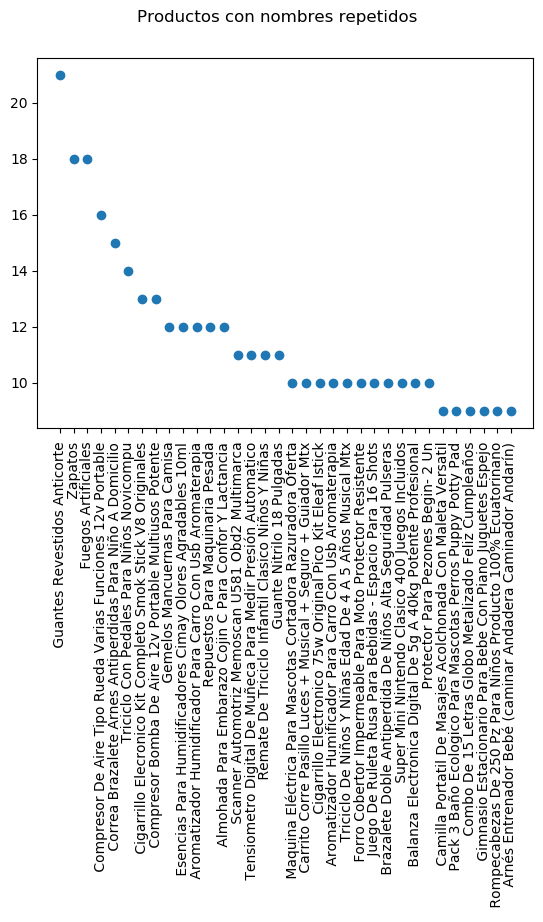

In [9]:
conteo_titulos_original = df_3["titulo"].value_counts()
conteo_titulos= conteo_titulos_original[(conteo_titulos_original>8)]


names = list(conteo_titulos.index)
values = list(conteo_titulos)
fig, axs = plt.subplots()
axs.scatter(names, values)
fig.suptitle('Productos con nombres repetidos')
plt.xticks(rotation=90)
plt.show()




## Bibliografía
- __[https://subscription.packtpub.com/book/application_development/9781785287466/3/ch03lvl1sec46/creating-a-pandas-dataframe-from-a-json-file](https://subscription.packtpub.com/book/application_development/9781785287466/3/ch03lvl1sec46/creating-a-pandas-dataframe-from-a-json-file)__
- __[https://stackoverflow.com/questions/29903025/count-most-frequent-100-words-from-sentences-in-dataframe-pandas](https://stackoverflow.com/questions/29903025/count-most-frequent-100-words-from-sentences-in-dataframe-pandas)__
- __[https://matplotlib.org/3.1.1/gallery/subplots_axes_and_figures/subplots_adjust.html#sphx-glr-gallery-subplots-axes-and-figures-subplots-adjust-py](https://matplotlib.org/3.1.1/gallery/subplots_axes_and_figures/subplots_adjust.html#sphx-glr-gallery-subplots-axes-and-figures-subplots-adjust-py)__
- __[https://matplotlib.org/3.1.1/gallery/pie_and_polar_charts/polar_bar.html#sphx-glr-gallery-pie-and-polar-charts-polar-bar-py](https://matplotlib.org/3.1.1/gallery/pie_and_polar_charts/polar_bar.html#sphx-glr-gallery-pie-and-polar-charts-polar-bar-py)__
- __[https://markdown-it.github.io/](https://markdown-it.github.io/)__

## Anexos

Tabla de datos

In [10]:
df_3

,categoria,precio_decimales,precio_fraccion,provincia,ruta_detalles,titulo
0,Animales y Mascotas,0,10,Pichincha ( Quito ),https://articulo.mercadolibre.com.ec/MEC-42434...,Termostato 6 Pantallas Y Mas Repuestos Incuba...
1,Animales y Mascotas,0,231,Pichincha ( Quito ),https://articulo.mercadolibre.com.ec/MEC-42425...,Incubadora Avícola Totalmente Automática De 5...
2,Animales y Mascotas,99,198,Guayas,https://articulo.mercadolibre.com.ec/MEC-42411...,"Incubadora Económica Nuevas De 96 Huevos, Dig..."
3,Animales y Mascotas,0,1.149,Guayas,https://articulo.mercadolibre.com.ec/MEC-42430...,"Incubadora De Aves 1056 Huevos, Volteo Automá..."
4,Animales y Mascotas,0,85,Santo Domingo de los Tsáchilas,https://articulo.mercadolibre.com.ec/MEC-42386...,"Bebedero Niple $0.85 Ctv. Aves, Pollos, Galli..."
5,Animales y Mascotas,0,235,Pichincha ( Quito ),https://articulo.mercadolibre.com.ec/MEC-42398...,"Incubadoras Económica 56 Huevos, Volteo Autom..."
6,Animales y Mascotas,0,550,Santo Domingo de los Tsáchilas,https://articulo.mercadolibre.com.ec/MEC-42444...,Incubadora Nacedora 3168-2112-1056-528-264 Hu...
7,Animales y Mascotas,0,42,Pichincha ( Quito ),https://articulo.mercadolibre.com.ec/MEC-42430...,Criadoras O Calentadoras Para Pollos O Cerdos...
8,Animales y Mascotas,0,100,Pichincha ( Quito ),https://articulo.mercadolibre.com.ec/MEC-42450...,Incubadoras Automaticas Para 32 Huevos
9,Animales y Mascotas,0,31,Cotopaxi,https://articulo.mercadolibre.com.ec/MEC-42387...,Jaulas Guacales Plástico Transporte De Pollos...
